<a href="https://colab.research.google.com/github/AzadMehedi/ML-Projects/blob/main/Predict_The_Flight_Ticket_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Ticket price **Prediction**

Inorder to train a linear regression for predicting the price of cars, the problem is divided into 4 part.
1. Data Understanding and exploration
2. Data Cleaning
3. Data Preparation
4. Model Building and evaluation

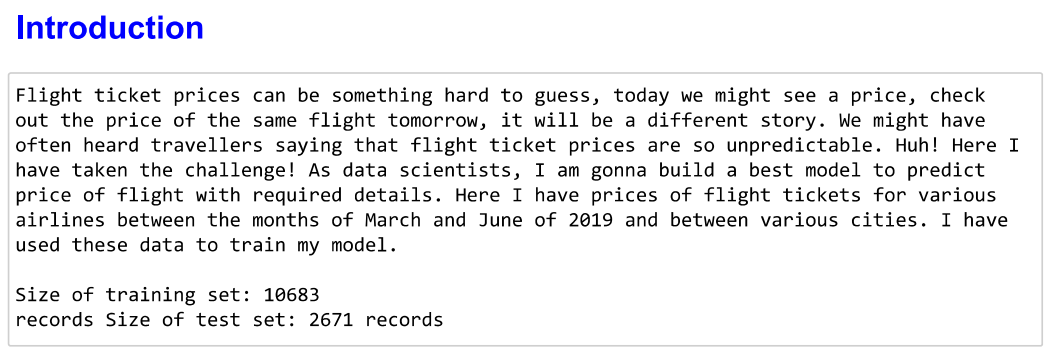

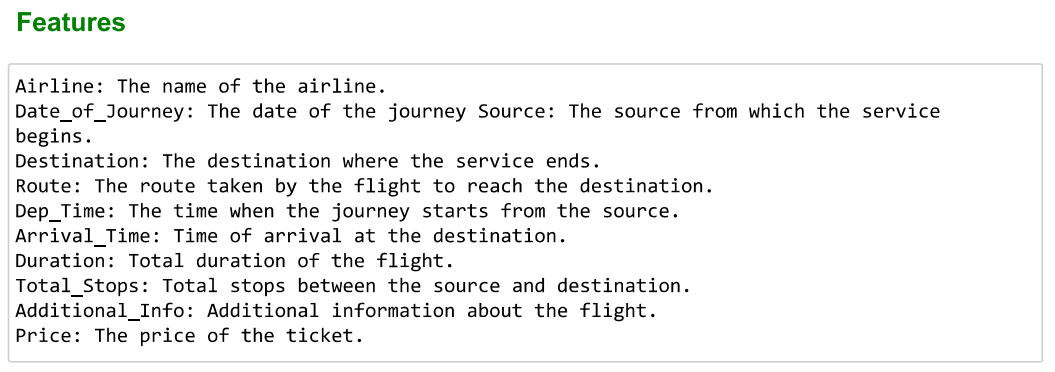

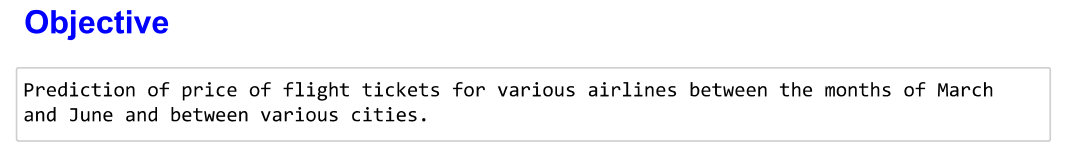

1. Data Understanding and Exploration

Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# importing dataset

In [3]:
train_df = pd.read_excel('/content/Data_Train.xlsx')
test_df = pd.read_excel('/content/Test_set.xlsx')
sub_df = pd.read_excel('/content/Sample_submission.xlsx')

In [4]:
# copy dataframes
df = train_df.copy()
df1 = test_df.copy()
df2 = sub_df.copy()

In [5]:
# checking first 5 rows using head()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# checking random data using .sample()
df.sample(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8602,Air India,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 28 Jun,23h 30m,2 stops,No info,9653
1769,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,21:00,07:40 16 Jun,10h 40m,1 stop,No info,8372
5971,SpiceJet,3/06/2019,Kolkata,Banglore,CCU → BLR,06:55,09:30,2h 35m,non-stop,No check-in baggage included,3841
9083,Jet Airways,6/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,22:05 07 May,25h 40m,1 stop,In-flight meal not included,9314
7605,GoAir,9/05/2019,Kolkata,Banglore,CCU → AMD → BLR,16:40,00:15 10 May,7h 35m,1 stop,No info,8777
9866,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,22:35,16h 5m,1 stop,No info,13339
8116,IndiGo,21/03/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:45,1h 25m,non-stop,No info,4049
5877,IndiGo,21/03/2019,Delhi,Cochin,DEL → AMD → COK,07:45,13:40,5h 55m,1 stop,No info,6101
5403,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → BOM → COK,02:15,12:55,10h 40m,1 stop,In-flight meal not included,18260
8769,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,22:05 10 Jun,25h 40m,1 stop,No info,12692


In [7]:
# checking testing data
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
# checking submission data
df2.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


# checking shape, dtypes, missing values of the dataset

# Train Dataset

In [9]:
# checking shape of the datasets
print('Shape of Training data: ',df.shape)

Shape of Training data:  (10683, 11)


In [10]:
# Train Dataset's dtypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
# checking informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
# checking statistical summary
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
# missing values & duplicate values
print('Number of Duplicate Values in Training Dataset: ', df.duplicated().sum())
print('Number of Missing values in Trainging Dataset: ', df.isnull().sum().count())
print(df.isnull().sum().sort_values(ascending=False))


Number of Duplicate Values in Training Dataset:  220
Number of Missing values in Trainging Dataset:  11
Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64


# test Dataset

In [14]:
# shape of Tesing dataset
print('Shape of Testing data: ',df1.shape)

Shape of Testing data:  (2671, 10)


In [15]:
# Test Dataset's dtypes
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [16]:
# checking shape of test dataset
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [17]:
# checking statistical summary
df1.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [18]:
# missing values & duplicate values
print('Number of Duplicate Values in Testing Dataset: ', df1.duplicated().sum())
print('Number of Missing values in Testing Dataset: ', df1.isnull().sum().count())
print(df1.isnull().sum().sort_values(ascending=False))

Number of Duplicate Values in Testing Dataset:  26
Number of Missing values in Testing Dataset:  10
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


# Submission Dataset

In [19]:
# Submission Dataset's dtypes
df2.dtypes

Price    int64
dtype: object

In [20]:
# shape of Submission dataset
print('Shape of Submission data: ',df2.shape)

Shape of Submission data:  (2671, 1)


In [21]:
# statistical summary of Submission dataset
df2.describe()

,Price
count,2671.000000
mean,20159.514414
std,5005.399225
min,10138.000000
25%,16469.500000
50%,19582.000000
75%,23476.500000
max,64881.000000


In [22]:
# missing values & duplicate values
print('Number of Duplicate Values in Testing Dataset: ', df2.duplicated().sum())
print('Number of Missing values in Testing Dataset: ', df2.isnull().sum().count())
print(df2.isnull().sum().sort_values(ascending=False))

Number of Duplicate Values in Testing Dataset:  209
Number of Missing values in Testing Dataset:  1
Price    0
dtype: int64


# Drop all the duplicated values from Train dataset

In [23]:
print('Number of Duplicate Values in Train Dataset: ', df.duplicated().sum())

Number of Duplicate Values in Train Dataset:  220


In [24]:
df = df.drop_duplicates()
print('Duplicated values after droping: ',df.duplicated().sum())
df.shape


Duplicated values after droping:  0


(10463, 11)

# missing values checking in plot

In [25]:
# import missingno library
!pip install missingno 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


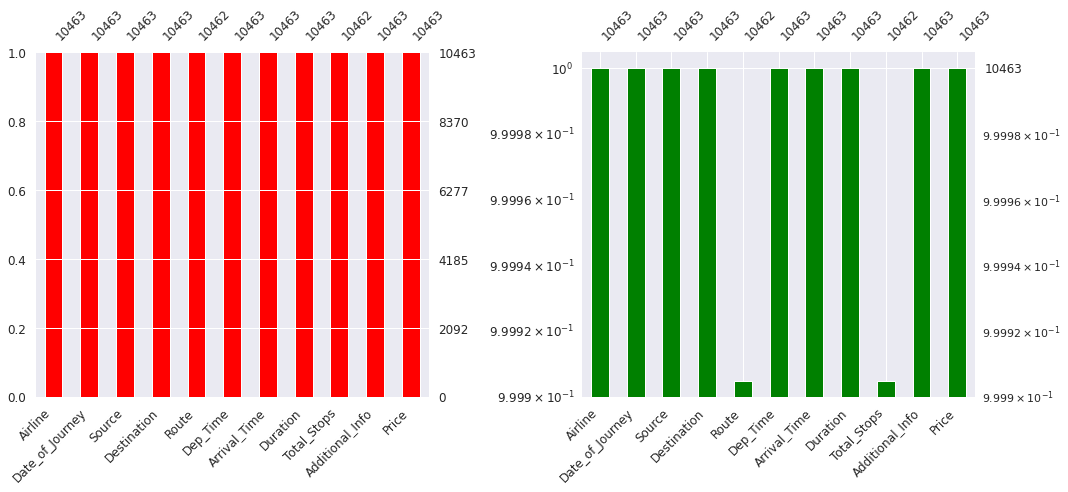

In [26]:
import missingno as msno
fig = plt.figure(figsize=(15,7)) # figure size

# Normal Axis
ax1 = fig.add_subplot(1,2,1) # create subplot in 1 row & 2 columns
msno.bar(df, color='red', fontsize=12, ax=ax1) # define size of bar

# Logarithmic Y-Axis
ax2 = fig.add_subplot(1,2,2) # create subplot in 1 row & 2 columns
msno.bar(df, log=True, color='green', fontsize=12, ax=ax2) # define size of bar

plt.tight_layout() # showing the layout

In [27]:
# checking missing values of Route  & Total_Stops  columns of Train dataset
df[df['Route'].isnull() | df['Total_Stops'].isnull()]
# df[df['Route'].isna() | df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


# drop the null values of Train dataset

In [28]:
df.shape

(10463, 11)

In [29]:
df.dropna(inplace=True)
print(df.shape)

(10462, 11)


In [30]:
# checking null values again
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA(Exploraory Data Analysis) & Feature Engineering

In [31]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [32]:
# convert Duration column into minutes

def convert_duration(duration):
  if len(duration.split()) == 2:
    hours = int(duration.split()[0][:-1]) # 1st index of duration is hour
    minutes = int(duration.split()[1][:-1]) # 2nd index of duration is munites
    return hours*60+minutes # convert all into manutes
  else:
    return int(duration[:-1])*60   # if no hour index

In [33]:
# calling the function
df['Duration_in_Minutes'] = df['Duration'].apply(convert_duration)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285


### now in test dataset, durations converts in minutes

In [34]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [35]:
df1['Duration_in_Minutes'] = df1['Duration'].apply(convert_duration)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_in_Minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,655
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,240
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,1425
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,780
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,170


# Departure Time & Arrival Time

In [36]:
df.dtypes

Airline                object
Date_of_Journey        object
Source                 object
Destination            object
Route                  object
Dep_Time               object
Arrival_Time           object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
Duration_in_Minutes     int64
dtype: object

In [37]:
# convert Arrival_Time, Dep_Time into datetime format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Dep_Time'])
df.dtypes

Airline                        object
Date_of_Journey                object
Source                         object
Destination                    object
Route                          object
Dep_Time               datetime64[ns]
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Duration_in_Minutes             int64
dtype: object

In [38]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-02-18 22:20:00,2023-02-18 22:20:00,2h 50m,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-18 05:50:00,2023-02-18 05:50:00,7h 25m,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-18 09:25:00,2023-02-18 09:25:00,19h,2 stops,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-02-18 18:05:00,2023-02-18 18:05:00,5h 25m,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-02-18 16:50:00,2023-02-18 16:50:00,4h 45m,1 stop,No info,13302,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,2023-02-18 19:55:00,2023-02-18 19:55:00,2h 30m,non-stop,No info,4107,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,2023-02-18 20:45:00,2023-02-18 20:45:00,2h 35m,non-stop,No info,4145,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,2023-02-18 08:20:00,2023-02-18 08:20:00,3h,non-stop,No info,7229,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2023-02-18 11:30:00,2023-02-18 11:30:00,2h 40m,non-stop,No info,12648,160


In [39]:
# create Dep_Time and Arrival_Time into minutes and hour into different colum
df['Dep_Time_in_hours'] = df['Dep_Time'].dt.hour
df['Dep_Time_in_minutes'] = df['Dep_Time'].dt.minute
df['Arrival_Time_in_hours'] = df['Arrival_Time'].dt.hour
df['Arrival_Time_in_minutes'] = df['Arrival_Time'].dt.minute

In [40]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_Minutes,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-02-18 22:20:00,2023-02-18 22:20:00,2h 50m,non-stop,No info,3897,170,22,20,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-18 05:50:00,2023-02-18 05:50:00,7h 25m,2 stops,No info,7662,445,5,50,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-18 09:25:00,2023-02-18 09:25:00,19h,2 stops,No info,13882,1140,9,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-02-18 18:05:00,2023-02-18 18:05:00,5h 25m,1 stop,No info,6218,325,18,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-02-18 16:50:00,2023-02-18 16:50:00,4h 45m,1 stop,No info,13302,285,16,50,16,50


## Delete unnessessary columns

In [41]:
df.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Duration_in_Minutes,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,170,22,20,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,445,5,50,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,1140,9,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,325,18,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,285,16,50,16,50


# Test Dataset
### create Dep_Time and Arrival_Time into minutes and hour into different column in test dataset also

In [42]:
print('In test dataset')

# first convert Dep_Time and Arrival_Time column into datetime format
df1['Dep_Time'] = pd.to_datetime(df1['Dep_Time'])
df1['Arrival_Time'] = pd.to_datetime(df1['Dep_Time'])

# create Dep_Time and Arrival_Time into minutes and hour into different column
df1['Dep_Time_in_hours'] = df1['Dep_Time'].dt.hour
df1['Dep_Time_in_minutes'] = df1['Dep_Time'].dt.minute
df1['Arrival_Time_in_hours'] = df1['Arrival_Time'].dt.hour
df1['Arrival_Time_in_minutes'] = df1['Arrival_Time'].dt.minute

# Drop Dep_Time and Arrival_Time column
df1.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df1.head()

In test dataset


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Duration_in_Minutes,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,655,17,30,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,240,6,20,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,1425,19,15,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,780,8,0,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,170,23,55,23,55


# Date of Journey Column (feature engineering)

In [43]:
df.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Duration_in_Minutes         int64
Dep_Time_in_hours           int64
Dep_Time_in_minutes         int64
Arrival_Time_in_hours       int64
Arrival_Time_in_minutes     int64
dtype: object

In [44]:
# convert the 'Date_of_Journey' dtype object to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df.dtypes

Airline                            object
Date_of_Journey            datetime64[ns]
Source                             object
Destination                        object
Route                              object
Duration                           object
Total_Stops                        object
Additional_Info                    object
Price                               int64
Duration_in_Minutes                 int64
Dep_Time_in_hours                   int64
Dep_Time_in_minutes                 int64
Arrival_Time_in_hours               int64
Arrival_Time_in_minutes             int64
dtype: object

In [45]:
# checking 'Date_of_Journey' column's years are unique or not
df['Date_of_Journey'].dt.year.unique()  # here is only one year. that is 2019


array([2019])

- here is only one unique year. so we only need to make two column. `months` and `days`

In [48]:
# extracting day and month column from Date_of_Journey column
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
# Dring the Date_of_Journey column
df.drop(['Date_of_Journey'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Duration_in_Minutes,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,170,22,20,22,20,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,445,5,50,5,50,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,1140,9,25,9,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,325,18,5,18,5,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,285,16,50,16,50,3,1


- in Test Dataset

In [50]:
df1.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Duration                   object
Total_Stops                object
Additional_Info            object
Duration_in_Minutes         int64
Dep_Time_in_hours           int64
Dep_Time_in_minutes         int64
Arrival_Time_in_hours       int64
Arrival_Time_in_minutes     int64
dtype: object

In [52]:
# converting dtype of Date_of_Journey into datetime
df1['Date_of_Journey'] = pd.to_datetime(df1['Date_of_Journey'])
df1.dtypes

Airline                            object
Date_of_Journey            datetime64[ns]
Source                             object
Destination                        object
Route                              object
Duration                           object
Total_Stops                        object
Additional_Info                    object
Duration_in_Minutes                 int64
Dep_Time_in_hours                   int64
Dep_Time_in_minutes                 int64
Arrival_Time_in_hours               int64
Arrival_Time_in_minutes             int64
dtype: object

In [53]:
# checking 'Date_of_Journey' column's years are unique or not
df1['Date_of_Journey'].dt.year.unique()  # here is only one year. that is 2019

array([2019])

In [54]:
# extracting day and month column from Date_of_Journey column
df1['Day'] = df1['Date_of_Journey'].dt.day
df1['Month'] = df1['Date_of_Journey'].dt.month
# Dring the Date_of_Journey column
df1.drop(['Date_of_Journey'], axis=1, inplace=True)
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Duration_in_Minutes,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,655,17,30,17,30,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,240,6,20,6,20,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,1425,19,15,19,15,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,780,8,0,8,0,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,170,23,55,23,55,24,6


checking Additional_Info column                   

In [57]:
# In train dataset
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

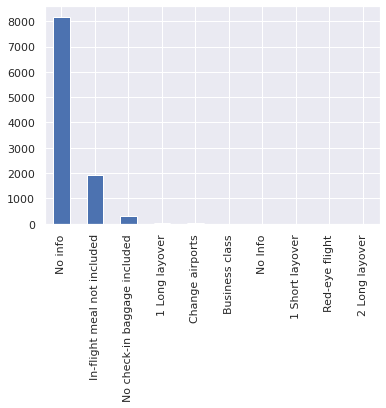

In [61]:
df['Additional_Info'].value_counts().plot(kind='bar')

In [63]:
df['Additional_Info'].value_counts()/len(df['Additional_Info'])*100

No info                         78.206844
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
No Info                          0.028675
1 Short layover                  0.009558
Red-eye flight                   0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

more than 78% of row have no files in `Additional_Info` column. so we can drop this column





In [66]:
df.drop('Additional_Info', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Duration_in_Minutes,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,170,22,20,22,20,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,445,5,50,5,50,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,1140,9,25,9,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,325,18,5,18,5,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,285,16,50,16,50,3,1


in Testing dataset

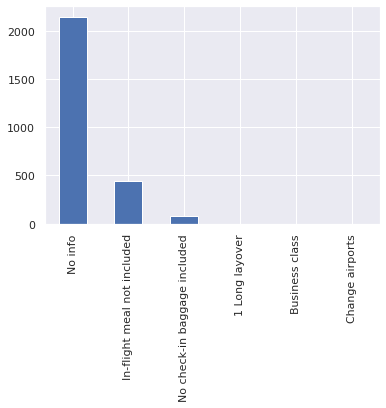

In [56]:
df1['Additional_Info'].value_counts().plot(kind='bar')

In [64]:
df1['Additional_Info'].value_counts()/len(df1['Additional_Info'])*100

No info                         80.419319
In-flight meal not included     16.622988
No check-in baggage included     2.845376
1 Long layover                   0.037439
Business class                   0.037439
Change airports                  0.037439
Name: Additional_Info, dtype: float64

In [67]:
# in test dataset, more than 80% of row have no files in Additional_Info column. so we can drop this column
df1.drop(['Additional_Info'], axis=1, inplace=True)
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Duration_in_Minutes,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,655,17,30,17,30,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,240,6,20,6,20,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,1425,19,15,19,15,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,780,8,0,8,0,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,170,23,55,23,55,24,6


In [70]:
df1.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops'], dtype='object')